<h1><center>Projet Python DU Sorbonne Data Analytics</center></h1>

<h2><center>TSURANOVA Svetlana, JEAN Luckner, FALL Aminata, BENZAIM Ryad </center></h2>

*L'objectif de ce projet est d'extraire les données des fichiers JSON recueillies au cours d'une compétition d'ergomètre, les placer dans les tableaux, de faire le calcul et de réaliser un graphique de correlation.*

#### Plan du Projet :

* **Input**<br>
  Nous avons à disposition, sous forme de 8 fichiers *.json*, les données recueillies au cours d'une compétition d'ergomètre pour 8 séries de 4 rameurs chacune. Nous devrons importer les données issues des différents fichiers. Nous devrons ensuite extraire les données nécessaires pour répondre à nos besoins.
* **Calcul**<br>
  Après avoir préparé les données, nous passerons à l'étape de calcul des **la vitesse moyenne en km/h** et **la longueur moyenne parcourue par coup de rame**, pour chaque portion de 500 m, ainsi que pour 2000 m. Une fois le calcul effectué, nous pourrons alors exporter nos résultats sous la forme d'un fichier *.csv*.

* **Graphique**<br>
  Enfin, nous devons réaliser un graphique de correlation entre la cadence et la longueur du coup.

## I. INPUT. Question 1

#### a) Tout d'abord, on commence avec une prise en main des données. On charge un fichier pour examiner les données.

In [7]:
# On commence par importer les bibliothèques qui nous intéressent, i.e.: Pandas, json
import json
import pandas as pd

In [8]:
# Nous chargeons un fichier JSON pour nous familiariser avec les données:
with open('Série 1(0001).json', 'r', encoding='utf-8') as file_1:
    ergometer_read_1 = json.load(file_1)
ergometer_read_1

{'results': {'c2_race_id': '',
  'duration': 2000,
  'ergrace_version': '02.01.17',
  'participants': [{'affiliation': '',
    'avg_pace': '1:59.3',
    'calories': 131,
    'class': '',
    'distance': 2000,
    'id': '',
    'lane': 3,
    'logbook_id': '',
    'logged_time': '22/01/2023 09:51:00',
    'machine_type': 'row',
    'participant': 'Eric',
    'place': 1,
    'score': '7:57.3',
    'serial_number': 430839301,
    'splits': [{'split_avg_pace': '1:59.4',
      'split_calories': 33,
      'split_distance': 500,
      'split_drag_factor': 120,
      'split_running_calories': 33,
      'split_running_distance': 500,
      'split_running_time': 1194,
      'split_stroke_count': 56,
      'split_stroke_rate': 28,
      'split_time': 1194,
      'split_type': 'distance_split'},
     {'split_avg_pace': '2:01.2',
      'split_calories': 32,
      'split_distance': 500,
      'split_drag_factor': 120,
      'split_running_calories': 65,
      'split_running_distance': 1000,
      's

#### b) On charge tous les fichiers json. On extrait les données qui nous intéressent en créant un dictionnaire de performance pour chaque participant (*performance*) et en ajoutant les performances du participant à la liste *rameurs_data*.

In [10]:
# Liste des fichiers JSON à charger 
files_names = ['Progressif.json', 'Série 1(0001).json', 'Série 2.json', 'Série 3.json', 'Série 4.json', 'Série 5.json', 'Série 6.json', 'Série 7.json']

In [11]:
# Liste pour stocker les données des participants de chaque fichier
rameurs_data = []

In [12]:
# Chargeons chaque fichier JSON
for file_name in files_names:
    try:
        with open(file_name, 'r', encoding='utf-8') as f:
            data = json.load(f)

            # Extrayons les données pour chaque participant
            for participant in data['results']['participants']:
                 splits = participant['splits']
                 total_split_stroke_count = sum(split['split_stroke_count'] for split in splits)
                
                 # Créons le dictionnaire de performance pour chaque participant avec les colonnes 'split_avg_pace', split_stroke_rate, split_stroke_count
                 performance = {
                     'participant': participant['participant'],
                     'time_2000': participant['time'],
                     'spm': participant['spm'], # la cadence moyenne sur 2000 m
                     'total_split_stroke_count': total_split_stroke_count , # le nombre de coups de rames sur 2000 m
                     **{f'split_avg_pace_{i+1}': splits[i]['split_avg_pace'] for i in range(4)},  # Le temps sur chaque portion de 500 m
                     **{f'split_stroke_rate_{i+1}': splits[i]['split_stroke_rate'] for i in range(4)}, # La cadence moyenne sur chaque portion de 500 m
                     **{f'split_stroke_count_{i+1}': splits[i]['split_stroke_count'] for i in range(4)} # le nombre de coups de rames sur chaque portion de 500 m
                 }

                 # Ajouter les performances du participant à la liste
                 rameurs_data.append(performance)

    except FileNotFoundError:
        print(f"Le fichier {file_name} n'a pas été trouvé.")
    except KeyError as e:
        print(f"Clé manquante {e} dans le fichier {file_name}.")


#### c) Créons un dataframe et exportons-le dans un fichier CSV.

In [14]:
# Créons un DataFrame à partir des performances des participants
df_rameurs = pd.DataFrame(rameurs_data)

df_rameurs

,participant,time_2000,spm,total_split_stroke_count,split_avg_pace_1,split_avg_pace_2,split_avg_pace_3,split_avg_pace_4,split_stroke_rate_1,split_stroke_rate_2,split_stroke_rate_3,split_stroke_rate_4,split_stroke_count_1,split_stroke_count_2,split_stroke_count_3,split_stroke_count_4
0,Maxime,6:33.4,28,186,1:41.6,1:42.0,1:37.6,1:32.1,26,25,29,34,44,43,47,52
1,Célestin,7:01.8,28,199,1:43.1,1:46.9,1:47.3,1:44.4,27,25,28,34,46,44,50,59
2,Julien,7:47.0,26,210,1:56.4,2:00.5,1:55.2,1:54.8,25,24,28,31,48,49,54,59
3,Neve,8:12.4,27,229,2:03.5,2:07.2,2:02.8,1:58.8,26,25,28,33,54,52,58,65
4,Eric,7:57.3,27,219,1:59.4,2:01.2,2:01.2,1:55.5,28,26,27,29,56,53,54,56
5,Edouard,8:03.7,30,242,1:54.8,2:05.5,2:05.3,1:58.1,31,29,29,31,59,60,61,62
6,Baptiste,8:21.1,24,208,1:58.6,2:05.4,2:10.7,2:06.5,27,24,23,27,53,50,49,56
7,Loïs,8:24.1,30,254,1:59.1,2:10.2,2:09.4,2:05.4,31,29,30,32,61,62,65,66
8,Usama,7:54.8,27,214,1:52.8,2:02.3,2:03.1,1:56.7,28,26,25,29,53,53,52,56
9,Noé,8:05.8,34,280,1:55.7,2:03.6,2:04.6,2:01.9,35,33,34,36,68,67,71,74


In [15]:
# exportons le dataframe dans un fichier CSV.
df_rameurs.to_csv('q1_rameurs.csv', index = False)  # index=False pour ne pas inclure l'index dans le fichier

## II. CALCUL. Question 2

#### a) Créons des fonctions pour calculer la vitesse et la longueur du coup de rame.
Créons une copie de Dataframe pour Q2.

In [18]:
df_q2 = df_rameurs

Сréons une fonction qui renvoie la vitesse moyenne en km/h si le temps est indiqué au format MM:SS.S

In [20]:
def avg_speed(distance, time): # distance en m
    minutes, seconds = time.split(':')  # Divisons la chaîne en minutes et secondes
    minutes = int(minutes)  # Convertissons en nombres
    seconds = float(seconds)
    total_minutes = minutes + (seconds / 60)  # Convertissons en minutes
    hours = total_minutes / 60      # Convertissons les minutes en heure
    avg_speed = (distance/1000) / hours    # Calculons la vitesse en km/h
    round_avg_speed = round(avg_speed, 2) # Arrondissons la vitesse
    return round_avg_speed

Créons une fonction qui retourne la longueur moyenne du coup sur une distance de 500 m:

In [22]:
def avg_stroke_length(distance, stroke_count): # distance en m
    length = round(distance/stroke_count, 2)
    return length

#### b) Créons de nouvelles colonnes en appliquant des fonctions.

In [24]:
# Calculons la vitesse moyenne sur 2000 m
distance = 2000
df_q2['avg_speed_2000'] = df_q2['time_2000'].apply(lambda row: avg_speed(distance, row))

In [25]:
# Vérifions que les colonnes ont été ajouté dans le dataframe
df_q2.columns

Index(['participant', 'time_2000', 'spm', 'total_split_stroke_count',
       'split_avg_pace_1', 'split_avg_pace_2', 'split_avg_pace_3',
       'split_avg_pace_4', 'split_stroke_rate_1', 'split_stroke_rate_2',
       'split_stroke_rate_3', 'split_stroke_rate_4', 'split_stroke_count_1',
       'split_stroke_count_2', 'split_stroke_count_3', 'split_stroke_count_4',
       'avg_speed_2000'],
      dtype='object')

In [26]:
# Calculons la vitesse moyenne sur chaque portion de 500 m
distance = 500
# Appliquons la fonction avg_speed à chaque ligne pour quatre colonnes de temps
for i in range(1, 5):
    col_time = f'split_avg_pace_{i}'
    col_speed = f'avg_split_speed_{i}'
    
    df_q2[col_speed] = df_q2.apply(lambda row: avg_speed(distance, row[col_time]), axis=1)

In [27]:
# Vérifions que les colonnes ont été ajoutéуes dans le dataframe
df_q2.columns

Index(['participant', 'time_2000', 'spm', 'total_split_stroke_count',
       'split_avg_pace_1', 'split_avg_pace_2', 'split_avg_pace_3',
       'split_avg_pace_4', 'split_stroke_rate_1', 'split_stroke_rate_2',
       'split_stroke_rate_3', 'split_stroke_rate_4', 'split_stroke_count_1',
       'split_stroke_count_2', 'split_stroke_count_3', 'split_stroke_count_4',
       'avg_speed_2000', 'avg_split_speed_1', 'avg_split_speed_2',
       'avg_split_speed_3', 'avg_split_speed_4'],
      dtype='object')

In [28]:
# Calculons la longueur moyenne parcourue par coup de rame sur chaque portion de 500 m:
distance = 500
for i in range(1, 5):
    df_q2[f'avg_stroke_length_{i}'] = df_q2.apply(
        lambda row: avg_stroke_length(distance, row[f'split_stroke_count_{i}']),
        axis=1
    )

In [29]:
# Vérifions que les colonnes ont été ajoutéуes dans le dataframe
df_q2.columns

Index(['participant', 'time_2000', 'spm', 'total_split_stroke_count',
       'split_avg_pace_1', 'split_avg_pace_2', 'split_avg_pace_3',
       'split_avg_pace_4', 'split_stroke_rate_1', 'split_stroke_rate_2',
       'split_stroke_rate_3', 'split_stroke_rate_4', 'split_stroke_count_1',
       'split_stroke_count_2', 'split_stroke_count_3', 'split_stroke_count_4',
       'avg_speed_2000', 'avg_split_speed_1', 'avg_split_speed_2',
       'avg_split_speed_3', 'avg_split_speed_4', 'avg_stroke_length_1',
       'avg_stroke_length_2', 'avg_stroke_length_3', 'avg_stroke_length_4'],
      dtype='object')

In [30]:
# Calculons la longueur moyenne parcourue par coup de rame sur 2000 m:
distance = 2000
df_q2['avg_stroke_length_2000'] = df_q2['total_split_stroke_count'].apply(lambda row: avg_stroke_length(distance, row))

In [31]:
df_q2.head()

,participant,time_2000,spm,total_split_stroke_count,split_avg_pace_1,split_avg_pace_2,split_avg_pace_3,split_avg_pace_4,split_stroke_rate_1,split_stroke_rate_2,...,avg_speed_2000,avg_split_speed_1,avg_split_speed_2,avg_split_speed_3,avg_split_speed_4,avg_stroke_length_1,avg_stroke_length_2,avg_stroke_length_3,avg_stroke_length_4,avg_stroke_length_2000
0,Maxime,6:33.4,28,186,1:41.6,1:42.0,1:37.6,1:32.1,26,25,...,18.30,17.72,17.65,18.44,19.54,11.36,11.63,10.64,9.62,10.75
1,Célestin,7:01.8,28,199,1:43.1,1:46.9,1:47.3,1:44.4,27,25,...,17.07,17.46,16.84,16.78,17.24,10.87,11.36,10.00,8.47,10.05
2,Julien,7:47.0,26,210,1:56.4,2:00.5,1:55.2,1:54.8,25,24,...,15.42,15.46,14.94,15.62,15.68,10.42,10.20,9.26,8.47,9.52
3,Neve,8:12.4,27,229,2:03.5,2:07.2,2:02.8,1:58.8,26,25,...,14.62,14.57,14.15,14.66,15.15,9.26,9.62,8.62,7.69,8.73
4,Eric,7:57.3,27,219,1:59.4,2:01.2,2:01.2,1:55.5,28,26,...,15.08,15.08,14.85,14.85,15.58,8.93,9.43,9.26,8.93,9.13


#### c) Créons un nouveau dataframe, dans lequel il ne restent que les series nécessaires:

In [33]:
df_q2_clean = df_q2[['participant', 'avg_speed_2000', 'avg_split_speed_1', 'avg_split_speed_2', 'avg_split_speed_3', 'avg_split_speed_4', \
                     'avg_stroke_length_2000', 'avg_stroke_length_1', 'avg_stroke_length_2', 'avg_stroke_length_3', 'avg_stroke_length_4']]

In [34]:
df_q2_clean

,participant,avg_speed_2000,avg_split_speed_1,avg_split_speed_2,avg_split_speed_3,avg_split_speed_4,avg_stroke_length_2000,avg_stroke_length_1,avg_stroke_length_2,avg_stroke_length_3,avg_stroke_length_4
0,Maxime,18.30,17.72,17.65,18.44,19.54,10.75,11.36,11.63,10.64,9.62
1,Célestin,17.07,17.46,16.84,16.78,17.24,10.05,10.87,11.36,10.00,8.47
2,Julien,15.42,15.46,14.94,15.62,15.68,9.52,10.42,10.20,9.26,8.47
3,Neve,14.62,14.57,14.15,14.66,15.15,8.73,9.26,9.62,8.62,7.69
4,Eric,15.08,15.08,14.85,14.85,15.58,9.13,8.93,9.43,9.26,8.93
5,Edouard,14.89,15.68,14.34,14.37,15.24,8.26,8.47,8.33,8.20,8.06
6,Baptiste,14.37,15.18,14.35,13.77,14.23,9.62,9.43,10.00,10.20,8.93
7,Loïs,14.28,15.11,13.82,13.91,14.35,7.87,8.20,8.06,7.69,7.58
8,Usama,15.16,15.96,14.72,14.62,15.42,9.35,9.43,9.43,9.62,8.93
9,Noé,14.82,15.56,14.56,14.45,14.77,7.14,7.35,7.46,7.04,6.76


#### d) Exportons le dataframe dans un fichier CSV.

In [36]:
# Exportons dans csv:
df_q2_clean.to_csv('q2_rameurs.csv', index = False)  # index=False pour ne pas inclure l'index dans le fichier

## III. Graphique. Question 3

Il faut placer sur un graphique admettant en abscisse la cadence moyenne sur 500 et en ordonnée la longueur moyenne du coup sur 500 **tous les points correspondant aux enregistrements sur 500m**. Lorsque nous avons 4 enregistrements sur 500 m pour chaque variable pour chaque rameur (4 splits), on utilise les données pour tous enregistrements sur 500 m (pour chaque split).

#### a) Importons la  bibliothèque nécessaire.

In [40]:
import matplotlib.pyplot as plt

#### b) Préparons les données

In [42]:
# Créons un dataframe avec les variables nécessaires pour le graphique.
df_c = df_q2[['split_stroke_rate_1', 'split_stroke_rate_2', 'split_stroke_rate_3', 'split_stroke_rate_4',\
                     'avg_stroke_length_1', 'avg_stroke_length_2', 'avg_stroke_length_3', 'avg_stroke_length_4',\
                     'avg_split_speed_1', 'avg_split_speed_2', 'avg_split_speed_3', 'avg_split_speed_4']]

In [43]:
df_c.columns

Index(['split_stroke_rate_1', 'split_stroke_rate_2', 'split_stroke_rate_3',
       'split_stroke_rate_4', 'avg_stroke_length_1', 'avg_stroke_length_2',
       'avg_stroke_length_3', 'avg_stroke_length_4', 'avg_split_speed_1',
       'avg_split_speed_2', 'avg_split_speed_3', 'avg_split_speed_4'],
      dtype='object')

Il faut concaténer les colonnes verticalement afin d'obtenir 3 colonnes.

In [45]:
# Utilisons la fonction concat pour concaténer les colonnes.
df_c_combined = pd.DataFrame({
    'split_stroke_rate': pd.concat([df_c['split_stroke_rate_1'], df_c['split_stroke_rate_2'], df_c['split_stroke_rate_3'], df_c['split_stroke_rate_4']], ignore_index=True),
    'avg_stroke_length': pd.concat([df_c['avg_stroke_length_1'], df_c['avg_stroke_length_2'], df_c['avg_stroke_length_3'], df_c['avg_stroke_length_4']], ignore_index=True),
    'avg_split_speed': pd.concat([df_c['avg_split_speed_1'], df_c['avg_split_speed_2'], df_c['avg_split_speed_3'], df_c['avg_split_speed_4']], ignore_index=True)
})

In [46]:
df_c_combined.head()

,split_stroke_rate,avg_stroke_length,avg_split_speed
0,26,11.36,17.72
1,27,10.87,17.46
2,25,10.42,15.46
3,26,9.26,14.57
4,28,8.93,15.08


#### c) Créons le graphique et répondons aux questions:
A quelle cadence la vitesse maximale est-elle atteinte ? 
A quel point cela correspond-il sur le graphique ?

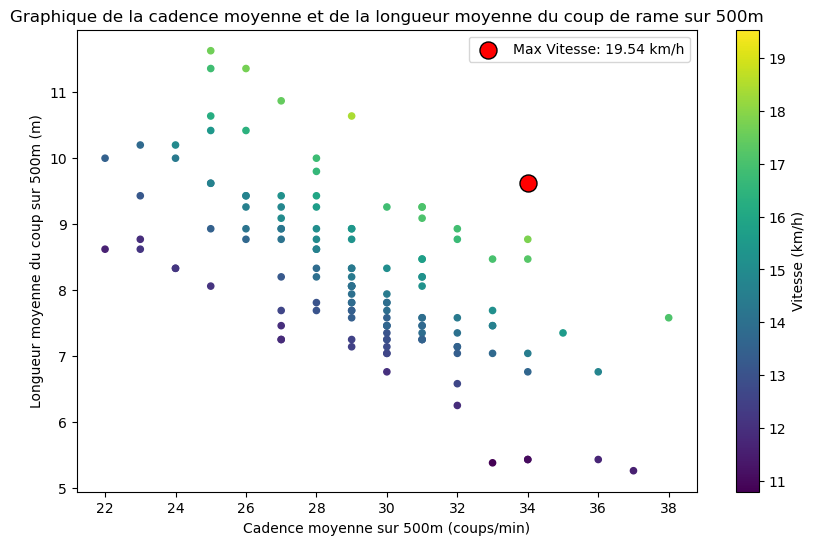

La vitesse maximale de 19.54 km/h est atteinte à une cadence de 34.0 coups/min
Le point correspondant sur le graphique a une longueur moyenne par coup de 9.62 mètres


In [48]:
# Prendre les differents éléments plt pour le tracer du graphique de dispersion
plt.figure(figsize=(10, 6))
plt.scatter(df_c_combined['split_stroke_rate'], df_c_combined['avg_stroke_length'], c = df_c_combined['avg_split_speed'], cmap = 'viridis', s = 20)
plt.colorbar(label='Vitesse (km/h)')
plt.xlabel('Cadence moyenne sur 500m (coups/min)')
plt.ylabel('Longueur moyenne du coup sur 500m (m)')
plt.title('Graphique de la cadence moyenne et de la longueur moyenne du coup de rame sur 500m')

# Trouver la cadence associée à la vitesse maximale
max_speed_idx = df_c_combined['avg_split_speed'].idxmax()
max_speed_row = df_c_combined.loc[max_speed_idx]

# Afficher le point correspondant à la vitesse maximale
plt.scatter(max_speed_row['split_stroke_rate'], max_speed_row['avg_stroke_length'], color='red', edgecolor='k', s=150, label=f"Max Vitesse: {max_speed_row['avg_split_speed']:.2f} km/h")
plt.legend()

# Afficher le graphique
plt.show()

# Résultats : Cadence de la vitesse maximale
print(f"La vitesse maximale de {max_speed_row['avg_split_speed']:.2f} km/h est atteinte à une cadence de {max_speed_row['split_stroke_rate']} coups/min")
print(f"Le point correspondant sur le graphique a une longueur moyenne par coup de {max_speed_row['avg_stroke_length']:.2f} mètres")